In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train=pd.read_csv("/content/train_v9rqX0R.csv")
train_original=pd.read_csv("/content/train_v9rqX0R.csv")
test=pd.read_csv("/content/test_AbJTz2l.csv")
test_original=pd.read_csv("/content/test_AbJTz2l.csv")




train.Outlet_Size.fillna('New_Category',inplace=True)
test.Outlet_Size.fillna('New_Category',inplace=True)

train['Weight_random']=train.Item_Weight
rand_sam=train["Item_Weight"].dropna().sample(train["Item_Weight"].isnull().sum(),random_state=0)
rand_sam.index=train[train["Item_Weight"].isnull()].index
train.loc[train["Item_Weight"].isnull(),"Weight_random"]=rand_sam

test['Weight_random']=test.Item_Weight
rand_sam=test["Item_Weight"].dropna().sample(test["Item_Weight"].isnull().sum(),random_state=0)
rand_sam.index=test[test["Item_Weight"].isnull()].index
test.loc[test["Item_Weight"].isnull(),"Weight_random"]=rand_sam

IQR=train.Item_Visibility.quantile(0.75)-train.Item_Visibility.quantile(0.25)
lower_bridge=train.Item_Visibility.quantile(0.25)-1.5*IQR
upper_bridge=train.Item_Visibility.quantile(0.75)+1.5*IQR

train.loc[train.Item_Visibility>upper_bridge,'Item_Visibility']=upper_bridge

IQR=test.Item_Visibility.quantile(0.75)-test.Item_Visibility.quantile(0.25)
lower_bridge1=test.Item_Visibility.quantile(0.25)-1.5*IQR
upper_bridge1=test.Item_Visibility.quantile(0.75)+1.5*IQR

test.loc[test.Item_Visibility>upper_bridge1,'Item_Visibility']=upper_bridge1


train=train.drop('Item_Weight',axis=1)
test=test.drop('Item_Weight',axis=1)

train=train.drop('Item_Identifier',axis=1)
test=test.drop('Item_Identifier',axis=1)
train=train.drop('Outlet_Identifier',axis=1)
test=test.drop('Outlet_Identifier',axis=1)

y_train=train.Item_Outlet_Sales
train=train.drop('Item_Outlet_Sales',axis=1)




In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()


In [ ]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train=sc.fit_transform(train)
test=sc.transform(test)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train1,y_test=train_test_split(train,y_train,test_size=0.2,random_state=0)

In [ ]:
train.shape

(8523, 36)

In [ ]:
x_test.shape

(1705, 24)

In [ ]:
import keras


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
regr=Sequential()


In [ ]:
regr.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu',input_dim=36))
regr.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))
regr.add(Dense(units=5,kernel_initializer='he_uniform',activation='relu'))
regr.add(Dense(units=1,kernel_initializer='he_uniform'))


In [ ]:
regr.compile(optimizer='adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
model_new=regr.fit(train,y_train,validation_split=0.33, epochs=100)

Epoch 1/100
179/179 [==============================] - 0s 2ms/step - loss: 7650092.0000 - root_mean_squared_error: 2765.8799 - val_loss: 7479736.5000 - val_root_mean_squared_error: 2734.9106
Epoch 2/100
179/179 [==============================] - 0s 2ms/step - loss: 7119270.5000 - root_mean_squared_error: 2668.1960 - val_loss: 6268102.5000 - val_root_mean_squared_error: 2503.6179
Epoch 3/100
179/179 [==============================] - 0s 2ms/step - loss: 4690971.5000 - root_mean_squared_error: 2165.8650 - val_loss: 2910084.5000 - val_root_mean_squared_error: 1705.8970
Epoch 4/100
179/179 [==============================] - 0s 2ms/step - loss: 2015243.2500 - root_mean_squared_error: 1419.5927 - val_loss: 1646936.0000 - val_root_mean_squared_error: 1283.3301
Epoch 5/100
179/179 [==============================] - 0s 2ms/step - loss: 1499169.6250 - root_mean_squared_error: 1224.4059 - val_loss: 1487634.6250 - val_root_mean_squared_error: 1219.6863
Epoch 6/100
179/179 [========================

In [ ]:
pred=reg.predict(test)
subm=pd.read_csv("/content/sample_submission_8RXa3c6.csv")


In [ ]:
subm.Item_Outlet_Sales=pred

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

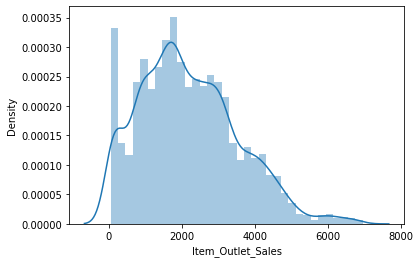

In [ ]:
subm.loc[subm.Item_Outlet_Sales<0,'Item_Outlet_Sales']=0
sns.distplot(subm.Item_Outlet_Sales)
plt.show

In [ ]:

subm.to_csv("/content/sample_submission.csv",index=False)

In [ ]:
train.Outlet_Size=label_encoder.fit_transform(train.Outlet_Size)
train.Outlet_Type=label_encoder.fit_transform(train.Outlet_Type)
train.Item_Fat_Content=label_encoder.fit_transform(train.Item_Fat_Content)
train.Outlet_Location_Type=label_encoder.fit_transform(train.Outlet_Location_Type)
test.Outlet_Size=label_encoder.fit_transform(test.Outlet_Size)
test.Outlet_Type=label_encoder.fit_transform(test.Outlet_Type)
test.Outlet_Location_Type=label_encoder.fit_transform(test.Outlet_Location_Type)
test.Item_Fat_Content=label_encoder.fit_transform(test.Item_Fat_Content)